In [1]:
import pandas as pd
import collections
import numpy as np
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df_1= pd.read_csv("group-edges.csv",names=["A","B"])
pd.set_option("display.max_rows",None,"display.max_columns",None,"display.precision",3)
print(df_1)

                                                     A        B
0                 http://cam.cornell.edu/ph/index.html  student
1           http://cam.cornell.edu/~baggett/index.html  student
2                          http://cs-tr.cs.cornell.edu  project
3    http://cs.cornell.edu/info/courses/current/cs4...   course
4    http://cs.cornell.edu/info/courses/fall-95/cs4...   course
5    http://cs.cornell.edu/info/courses/spring-96/c...   course
6                               http://dri.cornell.edu  project
7         http://dri.cornell.edu/pub/people/davis.html    staff
8            http://metacrawler.cs.washington.edu:8080  project
9                           http://robios8.me.wisc.edu  project
10   http://robios8.me.wisc.edu/~lumelsky/lumelsky....  faculty
11   http://simon.cs.cornell.edu/info/courses/curre...   course
12   http://simon.cs.cornell.edu/info/courses/sprin...   course
13      http://simon.cs.cornell.edu/info/people/vogels    staff
14     http://simon.cs.cornell.edu/info/

In [3]:
lst_1=df_1["B"].tolist()
print(lst_1)

['student', 'student', 'project', 'course', 'course', 'course', 'project', 'staff', 'project', 'project', 'faculty', 'course', 'course', 'staff', 'project', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'course', 'faculty', 'staff', 'staff', 'faculty', 'faculty', 'faculty', 'faculty', 'faculty', 'faculty', 'faculty', 'faculty', 'faculty', 'faculty', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'student', 'faculty', 'faculty', 'staff', 'student', 'student', 'faculty', 'student', 'staff', 'staff', 'faculty', 'staff', 'student', 'student', 'faculty', 'student', 'faculty', 'student', 'student', 'student', 'student', 'student', 'faculty', 'student', 'student', 'student', 'stude

In [4]:
count_faculty=0
count_staff=0
count_project=0
count_student=0
count_course=0
for i in range(len(lst_1)):
    if lst_1[i]=="faculty":
        count_faculty+=1
        lst_1[i]= "faculty"+str(count_faculty)
        
    if lst_1[i]=="staff":
        count_staff+=1
        lst_1[i]= "staff"+str(count_staff)
        
    if lst_1[i]=="project":
        count_project+=1
        lst_1[i]= "project"+str(count_project)
        
    if lst_1[i]=="student":
        count_student+=1
        lst_1[i]= "student"+str(count_student)
        
    if lst_1[i]=="course":
        count_course+=1
        lst_1[i]= "course"+str(count_course)
print(lst_1)

['student1', 'student2', 'project1', 'course1', 'course2', 'course3', 'project2', 'staff1', 'project3', 'project4', 'faculty1', 'course4', 'course5', 'staff2', 'project5', 'course6', 'course7', 'course8', 'course9', 'course10', 'course11', 'course12', 'course13', 'course14', 'course15', 'course16', 'course17', 'course18', 'course19', 'course20', 'course21', 'course22', 'course23', 'course24', 'course25', 'course26', 'course27', 'course28', 'course29', 'course30', 'course31', 'course32', 'course33', 'course34', 'course35', 'course36', 'faculty2', 'staff3', 'staff4', 'faculty3', 'faculty4', 'faculty5', 'faculty6', 'faculty7', 'faculty8', 'faculty9', 'faculty10', 'faculty11', 'faculty12', 'student3', 'student4', 'student5', 'student6', 'student7', 'student8', 'student9', 'student10', 'student11', 'student12', 'student13', 'faculty13', 'faculty14', 'staff5', 'student14', 'student15', 'faculty15', 'student16', 'staff6', 'staff7', 'faculty16', 'staff8', 'student17', 'student18', 'faculty17',

In [5]:
df_1["New"]=lst_1

In [6]:
del df_1["B"]
print(df_1)

                                                     A         New
0                 http://cam.cornell.edu/ph/index.html    student1
1           http://cam.cornell.edu/~baggett/index.html    student2
2                          http://cs-tr.cs.cornell.edu    project1
3    http://cs.cornell.edu/info/courses/current/cs4...     course1
4    http://cs.cornell.edu/info/courses/fall-95/cs4...     course2
5    http://cs.cornell.edu/info/courses/spring-96/c...     course3
6                               http://dri.cornell.edu    project2
7         http://dri.cornell.edu/pub/people/davis.html      staff1
8            http://metacrawler.cs.washington.edu:8080    project3
9                           http://robios8.me.wisc.edu    project4
10   http://robios8.me.wisc.edu/~lumelsky/lumelsky....    faculty1
11   http://simon.cs.cornell.edu/info/courses/curre...     course4
12   http://simon.cs.cornell.edu/info/courses/sprin...     course5
13      http://simon.cs.cornell.edu/info/people/vogels      st

In [7]:
lst_2=df_1["A"].tolist()
print(lst_2)

['http://cam.cornell.edu/ph/index.html', 'http://cam.cornell.edu/~baggett/index.html', 'http://cs-tr.cs.cornell.edu', 'http://cs.cornell.edu/info/courses/current/cs415/cs414.html', 'http://cs.cornell.edu/info/courses/fall-95/cs415/cs415.html', 'http://cs.cornell.edu/info/courses/spring-96/cs432/cs432.html', 'http://dri.cornell.edu', 'http://dri.cornell.edu/pub/people/davis.html', 'http://metacrawler.cs.washington.edu:8080', 'http://robios8.me.wisc.edu', 'http://robios8.me.wisc.edu/~lumelsky/lumelsky.html', 'http://simon.cs.cornell.edu/info/courses/current/cs401', 'http://simon.cs.cornell.edu/info/courses/spring-96/cs515', 'http://simon.cs.cornell.edu/info/people/vogels', 'http://simon.cs.cornell.edu/info/projects/horus', 'http://www.cae.wisc.edu/~ece552', 'http://www.cs.cornell.edu', 'http://www.cs.cornell.edu/info/courses/current/cs100b/home.html', 'http://www.cs.cornell.edu/info/courses/current/cs211/home.html', 'http://www.cs.cornell.edu/info/courses/current/cs212/cs212.html', 'http

In [8]:
df_2= pd.read_csv("edges.csv",names=["C","D"])
pd.set_option("display.max_rows",None,"display.max_columns",None,"display.precision",3)
print(df_2)

                                                      C  \
0                  http://cam.cornell.edu/ph/index.html   
1            http://cam.cornell.edu/~baggett/index.html   
2                           http://cs-tr.cs.cornell.edu   
3                           http://cs-tr.cs.cornell.edu   
4                           http://cs-tr.cs.cornell.edu   
5                           http://cs-tr.cs.cornell.edu   
6                           http://cs-tr.cs.cornell.edu   
7                           http://cs-tr.cs.cornell.edu   
8                           http://cs-tr.cs.cornell.edu   
9                           http://cs-tr.cs.cornell.edu   
10                          http://cs-tr.cs.cornell.edu   
11                          http://cs-tr.cs.cornell.edu   
12    http://cs.cornell.edu/info/courses/current/cs4...   
13    http://cs.cornell.edu/info/courses/fall-95/cs4...   
14    http://cs.cornell.edu/info/courses/fall-95/cs4...   
15    http://cs.cornell.edu/info/courses/spring-96/c... 

In [9]:
lst_C=df_2["C"].tolist()
print(lst_C)

['http://cam.cornell.edu/ph/index.html', 'http://cam.cornell.edu/~baggett/index.html', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs-tr.cs.cornell.edu', 'http://cs.cornell.edu/info/courses/current/cs415/cs414.html', 'http://cs.cornell.edu/info/courses/fall-95/cs415/cs415.html', 'http://cs.cornell.edu/info/courses/fall-95/cs415/cs415.html', 'http://cs.cornell.edu/info/courses/spring-96/cs432/cs432.html', 'http://cs.cornell.edu/info/courses/spring-96/cs432/cs432.html', 'http://dri.cornell.edu', 'http://dri.cornell.edu', 'http://dri.cornell.edu/pub/people/davis.html', 'http://dri.cornell.edu/pub/people/davis.html', 'http://metacrawler.cs.washington.edu:8080', 'http://metacrawler.cs.washington.edu:8080', 'http://metacrawler.cs.washington.edu:8080', '

In [10]:
for i in range(len(lst_C)):
    x=lst_2.index(lst_C[i])
    df_2["C"].replace({lst_C[i]:lst_1[x]},inplace=True)
print(df_2)

               C                                                  D
0       student1  http://www.cs.cornell.edu/info/people/vavasis/...
1       student2  http://www.cs.cornell.edu/info/people/lnt/lnt....
2       project1       http://dri.cornell.edu/pub/people/davis.html
3       project1                          http://www.cs.cornell.edu
4       project1  http://www.cs.cornell.edu/info/people/alexey/a...
5       project1  http://www.cs.cornell.edu/info/people/brd/brd....
6       project1  http://www.cs.cornell.edu/info/people/crary/ho...
7       project1  http://www.cs.cornell.edu/info/people/dean/dea...
8       project1  http://www.cs.cornell.edu/info/people/dean/hom...
9       project1  http://www.cs.cornell.edu/info/people/kleinber...
10      project1  http://www.cs.cornell.edu/info/people/rus/home...
11      project1  http://www.cs.cornell.edu/info/projects/icap.html
12       course1  http://www.cs.cornell.edu/info/people/diyu/y.html
13       course2  http://www.cs.cornell.edu/info

In [11]:
lst_D=df_2["D"].tolist()
print(lst_D)

['http://www.cs.cornell.edu/info/people/vavasis/vavasis.html', 'http://www.cs.cornell.edu/info/people/lnt/lnt.html', 'http://dri.cornell.edu/pub/people/davis.html', 'http://www.cs.cornell.edu', 'http://www.cs.cornell.edu/info/people/alexey/alexey.html', 'http://www.cs.cornell.edu/info/people/brd/brd.html', 'http://www.cs.cornell.edu/info/people/crary/home.html', 'http://www.cs.cornell.edu/info/people/dean/dean.html', 'http://www.cs.cornell.edu/info/people/dean/home.html', 'http://www.cs.cornell.edu/info/people/kleinber/kleinber.html', 'http://www.cs.cornell.edu/info/people/rus/home.html', 'http://www.cs.cornell.edu/info/projects/icap.html', 'http://www.cs.cornell.edu/info/people/diyu/y.html', 'http://www.cs.cornell.edu/info/people/indira/homepage.html', 'http://www.cs.cornell.edu/info/people/seena/homepage.html', 'http://www.cs.cornell.edu/info/people/diyu/y.html', 'http://www.cs.cornell.edu/info/people/lucy/lucy.html', 'http://www.cs.cornell.edu/info/people/dean/home.html', 'http://ww

In [12]:
for i in range(len(lst_D)):
    y=lst_2.index(lst_D[i])
    df_2["D"].replace({lst_D[i]:lst_1[y]},inplace=True)
print(df_2)

               C           D
0       student1   faculty33
1       student2   faculty23
2       project1      staff1
3       project1     course7
4       project1    student6
5       project1   faculty13
6       project1   student16
7       project1   faculty16
8       project1      staff8
9       project1   faculty21
10      project1     staff15
11      project1   project14
12       course1   student18
13       course2   student32
14       course2   student63
15       course3   student18
16       course3   student52
17      project2      staff8
18      project2     staff15
19        staff1      staff8
20        staff1   project14
21      project3    project3
22      project3  student226
23      project3  student267
24      project3  student291
25      project4   course207
26      project4   project78
27      faculty1    project4
28      faculty1  student329
29       course4   student31
30       course5   student38
31       course5   student39
32        staff2   student47
33        staf

In [13]:
np.savetxt(r'WEBKB.txt', df_2.values, fmt='%s')

In [14]:
lst_From=df_2["C"].tolist()
lst_To=df_2["D"].tolist()

In [15]:
def findthemall(z):
    import pandas as pd
    import numpy as np
    lst_input_From=[]
    lst_input_To=[]
    pos_1=[i for i, x in enumerate(lst_From) if x.startswith(z)]
    for i in pos_1:
        lst_input_From.append(lst_From[i])
        lst_input_To.append(lst_To[i])
    pos_2=[i for i, x in enumerate(lst_To) if x.startswith(z)]
    for i in pos_2:
        lst_input_To.append(lst_To[i])
        lst_input_From.append(lst_From[i])
    lst_input=list(zip(lst_input_From, lst_input_To))
    lst_final=[]
    [lst_final.append(x) for x in lst_input if x not in lst_final]
    df_input=pd.DataFrame(lst_final, columns = ['From', 'To'])
    np.savetxt(str(z)+'.txt', df_input.values, fmt='%s')

In [16]:
findthemall("student")

In [17]:
findthemall("staff")

In [18]:
findthemall("faculty")

In [19]:
findthemall("project")

In [20]:
findthemall("course")

# PAGERANK

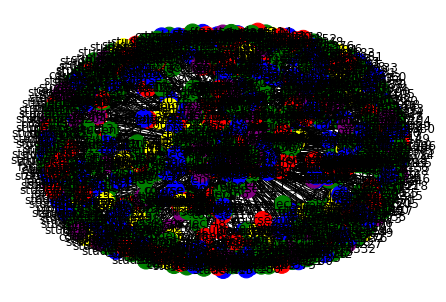

In [21]:
G= nx.read_edgelist(r"WEBKB.txt", create_using = nx.DiGraph, \
                     nodetype=str)
result_all = nx.pagerank(G)
sorted_result = sorted(result_all.items(), key=lambda kv: kv[1],reverse=True)
sorted_dict = collections.OrderedDict(sorted_result)
list_all_pagerank=list(sorted_dict)
color_map=[]
for i in list_all_pagerank:
    if i.startswith("student"):
        color_map.append('green')
    if i.startswith("staff"):
        color_map.append('yellow')
    if i.startswith("faculty"):
        color_map.append("red")
    if i.startswith("project"):
        color_map.append("purple")
    if i.startswith("course"):
        color_map.append("blue")
        
nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

In [22]:
def ranktorank(z):
    import networkx as nx
    import pandas as pd
    import matplotlib.pyplot as plt
    from scipy import stats
    
    G_z = nx.read_edgelist(str(z)+".txt", create_using = nx.DiGraph,nodetype=str)
    result_z = nx.pagerank(G_z)
    sorted_result_z = sorted(result_z.items(), key=lambda kv: kv[1],reverse=True)
    sorted_dict_z = collections.OrderedDict(sorted_result_z)
    list_result_z=list(sorted_dict_z)
    
    list_all_z=[]
    for i in list_all_pagerank:
        if i.startswith(z):
            list_all_z.append(i)
    ranks_all_z=[]
    for i in list_all_z:
        ranks_all_z.append((list_all_z).index(i) + 1)
        

    list_z_ini=list(list_result_z)
    list_z_fin=[]
    for i in list_z_ini:
        if i.startswith(z):
            list_z_fin.append(i)
    ranks_z = []
    for i in list_z_fin:
        ranks_z.append((list_z_fin).index(i) + 1)
    rank_z_fin=[]
    for i in range(len(list_all_z)):
        pos=list_z_fin.index(list_all_z[i])
        rank_z_fin.append(pos+1)
        
    list_z_rank=list(zip(list_all_z,ranks_z,rank_z_fin))
    df_z_rank=pd.DataFrame(list_z_rank,columns=[str(z),"Rank-All","Rank"])
    print(df_z_rank)
    r=stats.spearmanr(df_z_rank["Rank"],df_z_rank["Rank-All"])
    print(r)
    
    color_map=[]
    for i in list_all_pagerank:
        if i.startswith("student"):
            color_map.append('green')
        if i.startswith("staff"):
            color_map.append('yellow')
        if i.startswith("faculty"):
            color_map.append("red")
        if i.startswith("project"):
            color_map.append("purple")
        if i.startswith("course"):
            color_map.append("blue")
        
    nx.draw(G, node_color=color_map, with_labels=True)
    plt.show()

        student  Rank-All  Rank
0    student155         1    12
1    student376         2     1
2    student263         3     2
3    student319         4     3
4    student362         5     8
5    student307         6     6
6     student59         7     7
7     student75         8     9
8    student323         9     5
9    student302        10    17
10   student409        11    10
11   student286        12    11
12   student341        13    24
13   student189        14    23
14   student275        15    35
15   student387        16    16
16     student1        17    13
17   student293        18    22
18   student208        19    25
19   student340        20    32
20   student217        21    15
21   student361        22    27
22   student328        23    26
23   student373        24    28
24   student404        25    29
25   student356        26    31
26    student43        27    34
27   student237        28    14
28   student224        29    39
29   student256        30    40
30   stu

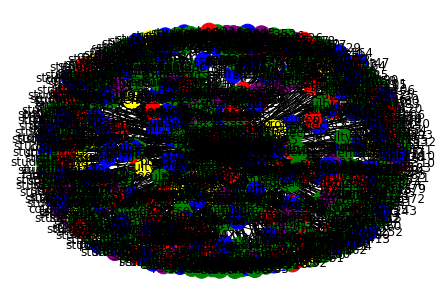

In [23]:
ranktorank("student")

      staff  Rank-All  Rank
0   staff21         1     1
1   staff12         2     2
2   staff37         3     3
3   staff20         4     6
4   staff31         5     4
5   staff23         6     5
6    staff2         7     8
7   staff35         8     9
8    staff8         9    10
9   staff17        10    14
10   staff7        11    15
11   staff6        12    16
12  staff13        13    18
13  staff28        14     7
14  staff38        15    20
15  staff15        16    21
16  staff30        17    22
17  staff36        18    24
18  staff39        19    28
19   staff9        20    17
20  staff34        21    26
21  staff24        22    12
22  staff29        23    23
23  staff33        24    11
24  staff25        25    13
25  staff32        26    19
26  staff27        27    25
27  staff19        28    27
28   staff1        29    29
29   staff3        30    33
30   staff4        31    34
31   staff5        32    35
32  staff10        33    36
33  staff11        34    37
34  staff14        3

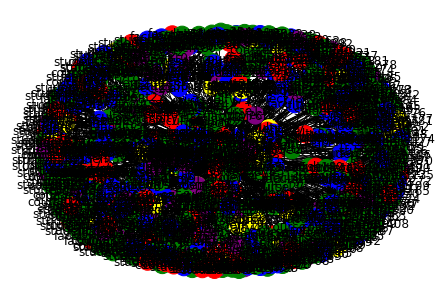

In [24]:
ranktorank("staff")

        faculty  Rank-All  Rank
0     faculty97         1     5
1     faculty85         2     7
2     faculty33         3     4
3     faculty74         4     1
4    faculty119         5     3
5     faculty98         6     6
6    faculty100         7     9
7    faculty101         8    23
8     faculty30         9    11
9    faculty120        10    12
10    faculty13        11     8
11    faculty26        12    10
12    faculty64        13    22
13    faculty71        14    21
14   faculty108        15    19
15    faculty83        16    20
16    faculty23        17    14
17    faculty54        18    15
18    faculty81        19    16
19   faculty105        20    18
20    faculty67        21    27
21    faculty51        22    25
22    faculty32        23    13
23    faculty53        24     2
24   faculty117        25    26
25    faculty37        26    30
26    faculty50        27    48
27   faculty103        28    17
28    faculty60        29    24
29    faculty86        30    59
30    fa

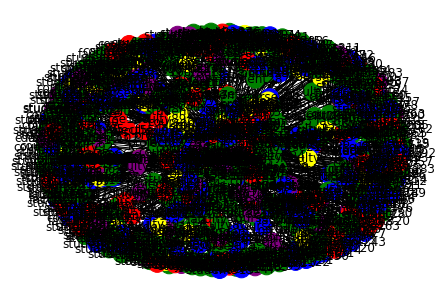

In [25]:
ranktorank("faculty")

        course  Rank-All  Rank
0    course163         1     1
1    course202         2     3
2     course79         3     5
3     course62         4     4
4    course215         5     7
5    course102         6     6
6     course46         7     2
7    course155         8    10
8    course156         9    11
9    course206        10    12
10    course99        11    14
11   course152        12     8
12    course40        13    30
13    course98        14    16
14   course190        15    17
15   course185        16    24
16    course89        17    18
17   course153        18    21
18   course154        19    22
19    course63        20    73
20   course184        21    25
21   course189        22    13
22   course212        23    19
23    course74        24    31
24    course77        25    32
25    course80        26    33
26    course83        27    34
27    course94        28    35
28    course97        29    36
29   course101        30    37
30   course194        31    38
31   cou

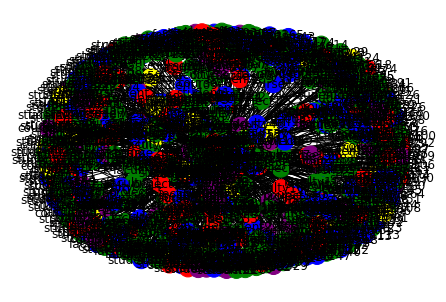

In [26]:
ranktorank("course")

      project  Rank-All  Rank
0   project49         1     2
1   project35         2     6
2   project34         3     4
3   project39         4     8
4   project26         5     3
5   project67         6     9
6   project25         7     7
7    project9         8    19
8   project41         9    26
9   project40        10    10
10  project22        11    11
11  project23        12    17
12   project6        13    18
13  project43        14    20
14  project56        15    21
15  project38        16    15
16  project68        17     5
17  project74        18    28
18  project75        19    30
19  project18        20    23
20  project51        21    13
21  project19        22    22
22  project37        23    14
23  project58        24    16
24  project50        25    12
25  project11        26    24
26  project76        27    38
27  project77        28    39
28  project45        29     1
29  project53        30    25
30  project80        31    27
31  project14        32    29
32  projec

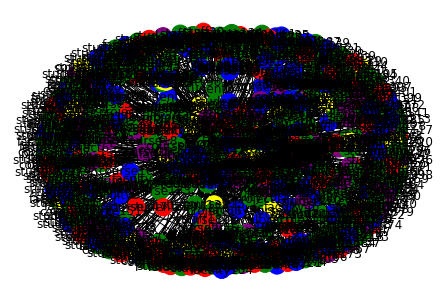

In [27]:
ranktorank("project")

# CLOSENESS- CENTRALITY

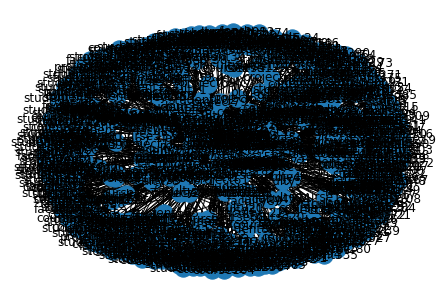

In [28]:
G_all_closeness = nx.read_edgelist(r"WEBKB.txt", create_using = nx.DiGraph, \
                     nodetype=str)
nx.draw(G_all_closeness, with_labels=True)
result_all_closeness = nx.closeness_centrality(G_all_closeness)
sorted_result_closeness = sorted(result_all_closeness.items(), key=lambda kv: kv[1],reverse=True)
sorted_dict_closeness = collections.OrderedDict(sorted_result_closeness)
list_all_closeness=list(sorted_dict_closeness)

In [29]:
def ranktorank_closeness(z):
    import matplotlib.pyplot as plt
    import networkx as nx
    import pandas as pd
    from scipy import stats
    G_z = nx.read_edgelist(str(z)+".txt", create_using = nx.DiGraph,nodetype=str)
    result_z = nx.closeness_centrality(G_z)
    
    sorted_result_closeness_z = sorted(result_z.items(), key=lambda kv: kv[1],reverse=True)
    sorted_dict_closeness_z = collections.OrderedDict(sorted_result_closeness_z)
    list_all_closeness_z=list(sorted_dict_closeness_z)
    
    list_all_z=[]
    for i in list_all_closeness:
        if i.startswith(z):
            list_all_z.append(i)
    ranks_all_z=[]
    for i in list_all_z:
        ranks_all_z.append((list_all_z).index(i) + 1)
        

    list_z_ini=list(list_all_closeness_z)
    list_z_fin=[]
    for i in list_z_ini:
        if i.startswith(z):
            list_z_fin.append(i)
    ranks_z = []
    for i in list_z_fin:
        ranks_z.append((list_z_fin).index(i) + 1)
    rank_z_fin=[]
    for i in range(len(list_all_z)):
        pos=list_z_fin.index(list_all_z[i])
        rank_z_fin.append(pos+1)
        
    list_z_rank=list(zip(list_all_z,ranks_z,rank_z_fin))
    df_z_rank=pd.DataFrame(list_z_rank,columns=[str(z),"Rank-All","Rank"])
    print(df_z_rank)
    r=stats.spearmanr(df_z_rank["Rank"],df_z_rank["Rank-All"])
    print(r)
    color_map=[]
    for i in list_all_closeness_z:
        if i.startswith(z):
            color_map.append('green')
        else:
            color_map.append('yellow')
    nx.draw(G_z, node_color=color_map, with_labels=True)
    plt.show()

      staff  Rank-All  Rank
0   staff20         1     3
1   staff37         2     1
2    staff2         3     5
3   staff23         4     2
4   staff31         5     6
5   staff28         6     4
6    staff8         7     7
7   staff34         8    22
8   staff12         9     8
9   staff17        10    11
10  staff27        11    14
11  staff15        12    10
12  staff24        13    12
13  staff25        14    13
14  staff29        15    15
15  staff30        16     9
16  staff33        17    16
17  staff36        18    17
18  staff35        19    18
19  staff32        20    36
20   staff3        21    24
21   staff4        22    25
22   staff5        23    26
23  staff10        24    27
24  staff11        25    28
25  staff14        26    29
26  staff16        27    20
27   staff9        28    31
28  staff19        29    35
29   staff1        30    19
30   staff7        31    23
31   staff6        32    30
32  staff13        33    32
33  staff21        34    21
34  staff22        3

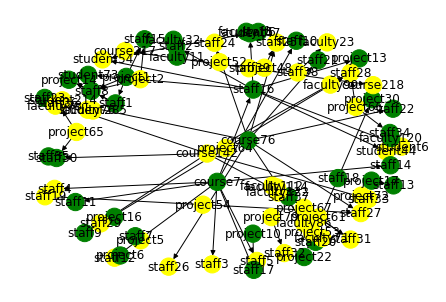

In [30]:
ranktorank_closeness("staff")

        student  Rank-All  Rank
0    student306         1     7
1    student155         2   231
2    student341         3     8
3    student319         4     1
4    student302         5    15
5    student350         6    14
6    student333         7    20
7    student173         8     6
8    student263         9     2
9    student208        10    17
10   student307        11     3
11   student219        12    45
12   student237        13     4
13   student305        14     9
14   student286        15    11
15   student190        16    24
16   student252        17    31
17   student278        18    33
18   student100        19    87
19   student140        20    88
20   student148        21    89
21   student394        22    26
22   student387        23    29
23    student23        24     5
24   student254        25    34
25   student138        26   101
26   student112        27    12
27   student359        28    44
28   student402        29    35
29    student11        30    22
30   stu

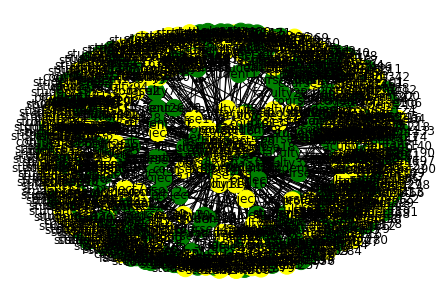

In [31]:
ranktorank_closeness("student")

        course  Rank-All  Rank
0     course62         1     4
1    course156         2     1
2    course155         3     2
3    course206         4     3
4    course212         5     7
5    course154         6     5
6    course148         7    10
7    course153         8     6
8    course149         9    12
9     course99        10    52
10   course152        11     8
11    course63        12    60
12   course196        13    21
13   course204        14     9
14   course197        15    11
15   course122        16    93
16    course93        17    35
17   course131        18    77
18   course141        19   121
19   course195        20    23
20   course121        21    27
21   course106        22   103
22   course119        23    42
23    course64        24    61
24    course65        25    66
25   course145        26    22
26   course175        27   135
27   course215        28    14
28   course167        29    43
29    course79        30    13
30   course109        31    20
31   cou

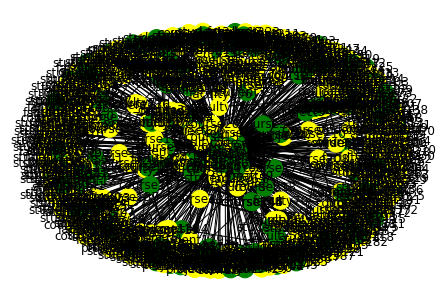

In [32]:
ranktorank_closeness("course")

      project  Rank-All  Rank
0   project22         1     1
1   project80         2     3
2   project45         3     2
3   project53         4    17
4   project74         5    25
5   project75         6    29
6   project33         7     4
7   project41         8    37
8   project76         9    35
9   project77        10    36
10  project36        11     5
11   project3        12    27
12  project34        13     6
13  project67        14     7
14  project42        15    52
15  project11        16    15
16  project19        17    16
17  project58        18     8
18  project40        19    21
19  project50        20    32
20  project35        21    10
21  project26        22     9
22  project49        23    13
23  project18        24    19
24  project37        25    11
25  project38        26    12
26  project73        27    14
27  project51        28    24
28  project25        29    20
29  project68        30    18
30  project30        31    22
31  project70        32    23
32  projec

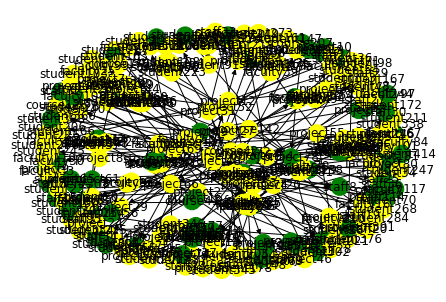

In [33]:
ranktorank_closeness("project")

        faculty  Rank-All  Rank
0     faculty97         1     3
1    faculty100         2     5
2     faculty53         3     1
3    faculty108         4     2
4     faculty67         5    11
5     faculty71         6    19
6     faculty83         7    12
7    faculty119         8     9
8     faculty85         9     4
9     faculty82        10    29
10    faculty57        11    35
11    faculty43        12    55
12    faculty76        13    23
13    faculty74        14     7
14   faculty120        15     6
15    faculty32        16     8
16   faculty117        17    10
17    faculty64        18    36
18   faculty114        19    21
19    faculty26        20    15
20    faculty88        21    25
21    faculty23        22    14
22    faculty51        23    17
23    faculty60        24    18
24    faculty33        25    22
25    faculty13        26    13
26    faculty47        27    16
27    faculty98        28    20
28    faculty50        29    59
29    faculty25        30    27
30    fa

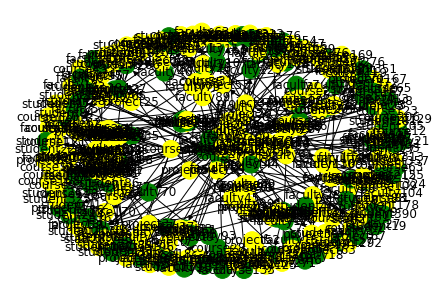

In [34]:
ranktorank_closeness("faculty")

# BETWEENNESS-CENTRALITY

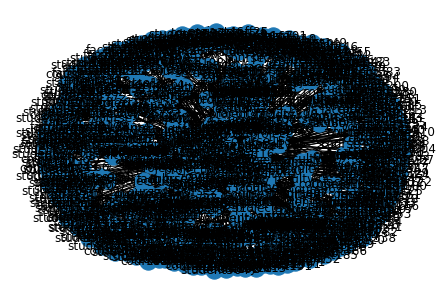

In [35]:
G = nx.read_edgelist("WEBKB.txt", create_using = nx.DiGraph,nodetype=str)
nx.draw(G, with_labels=True)
result_between = nx.betweenness_centrality(G)
sorted_result_between= sorted(result_between.items(), key=lambda kv: kv[1],reverse=True)
sorted_dict_between = collections.OrderedDict(sorted_result_between)
list_all_between=list(sorted_dict_between)

In [36]:
def ranktorank_between(z):
    import matplotlib.pyplot as plt
    import networkx as nx
    import pandas as pd
    from scipy import stats
    
    G_z = nx.read_edgelist(str(z)+".txt", create_using = nx.DiGraph,nodetype=str)
    result_z = nx.betweenness_centrality(G_z)
    
    sorted_result_between_z = sorted(result_z.items(), key=lambda kv: kv[1],reverse=True)
    sorted_dict_between_z = collections.OrderedDict(sorted_result_between_z)
    list_all_between_z=list(sorted_dict_between_z)
    
    list_all_z=[]
    for i in list_all_between:
        if i.startswith(z):
            list_all_z.append(i)
    ranks_all_z=[]
    for i in list_all_z:
        ranks_all_z.append((list_all_z).index(i) + 1)
        

    list_z_ini=list(list_all_between_z)
    list_z_fin=[]
    for i in list_z_ini:
        if i.startswith(z):
            list_z_fin.append(i)
    ranks_z = []
    for i in list_z_fin:
        ranks_z.append((list_z_fin).index(i) + 1)
    rank_z_fin=[]
    for i in range(len(list_all_z)):
        pos=list_z_fin.index(list_all_z[i])
        rank_z_fin.append(pos+1)
        
    list_z_rank=list(zip(list_all_z,ranks_z,rank_z_fin))
    df_z_rank=pd.DataFrame(list_z_rank,columns=[str(z),"Rank-All","Rank"])
    print(df_z_rank)
    r=stats.spearmanr(df_z_rank["Rank"],df_z_rank["Rank-All"])
    print(r)
    color_map=[]
    for i in list_all_between_z:
        if i.startswith(z):
            color_map.append('orange')
        else:
            color_map.append('purple')
    nx.draw(G_z, node_color=color_map, with_labels=True)
    plt.show()

      staff  Rank-All  Rank
0   staff37         1     1
1    staff2         2     3
2   staff16         3     2
3   staff34         4     7
4    staff8         5     5
5   staff12         6     6
6   staff30         7     4
7    staff1         8     8
8   staff15         9    14
9    staff7        10    15
10   staff3        11    16
11   staff4        12    17
12   staff5        13    18
13  staff10        14    19
14  staff11        15    20
15  staff14        16    21
16  staff17        17    22
17   staff6        18    23
18   staff9        19    24
19  staff13        20    25
20  staff18        21     9
21  staff20        22    26
22  staff21        23    10
23  staff22        24    27
24  staff23        25    28
25  staff24        26    29
26  staff25        27    30
27  staff26        28    31
28  staff27        29    32
29  staff19        30    33
30  staff28        31    34
31  staff29        32    35
32  staff33        33    36
33  staff36        34    37
34  staff31        3

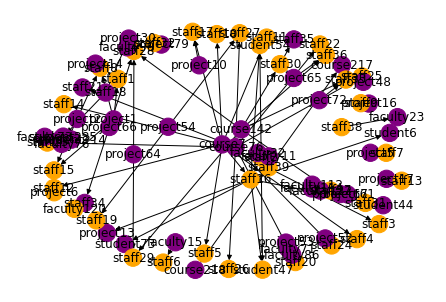

In [37]:
ranktorank_between("staff")

        student  Rank-All  Rank
0    student274         1     4
1    student237         2     1
2    student302         3     5
3    student263         4     3
4    student319         5     7
5    student208         6    10
6    student217         7     2
7    student195         8    12
8    student305         9    23
9    student307        10     8
10   student306        11    16
11   student315        12    17
12   student210        13     9
13    student33        14    13
14   student341        15    15
15   student201        16    14
16   student163        17    26
17   student267        18    49
18   student286        19    19
19   student226        20    63
20   student216        21    62
21   student112        22    20
22   student387        23     6
23    student25        24    18
24   student277        25    21
25   student390        26    32
26   student407        27    27
27   student396        28    28
28   student378        29    38
29   student328        30    51
30   stu

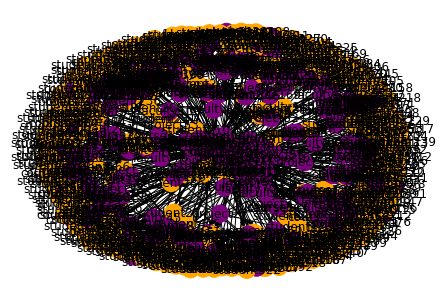

In [38]:
ranktorank_between("student")

        course  Rank-All  Rank
0    course153         1     1
1    course175         2    14
2    course152         3     4
3      course7         4     2
4    course155         5     3
5    course195         6     9
6    course196         7    12
7    course169         8    18
8    course212         9    11
9    course122        10    40
10   course145        11    13
11   course121        12    10
12   course182        13    22
13    course62        14     7
14    course93        15    29
15   course128        16    56
16   course217        17     8
17   course159        18     5
18   course206        19     6
19    course99        20    69
20    course26        21    15
21   course197        22    17
22   course204        23    16
23    course33        24    42
24    course34        25    37
25    course56        26    32
26   course135        27    70
27   course207        28    35
28   course183        29    76
29   course192        30    26
30   course103        31    24
31   cou

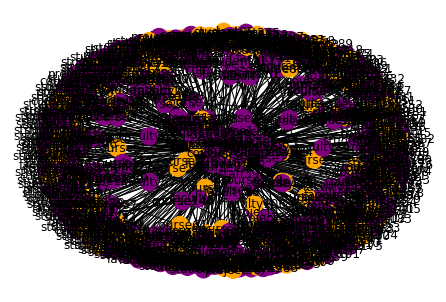

In [39]:
ranktorank_between("course")

        faculty  Rank-All  Rank
0     faculty71         1    10
1     faculty67         2     1
2     faculty76         3     2
3    faculty100         4     5
4     faculty97         5     6
5    faculty108         6     4
6     faculty83         7     3
7    faculty114         8     8
8     faculty85         9     7
9     faculty53        10    17
10    faculty51        11    11
11   faculty119        12    16
12    faculty70        13    14
13    faculty32        14     9
14    faculty57        15    20
15    faculty26        16    15
16    faculty88        17    19
17    faculty11        18    29
18    faculty90        19    31
19    faculty64        20    39
20   faculty120        21    18
21    faculty23        22    13
22    faculty38        23    30
23    faculty99        24    26
24    faculty60        25    12
25    faculty50        26    36
26    faculty62        27    38
27    faculty74        28    21
28    faculty20        29    28
29    faculty33        30    23
30    fa

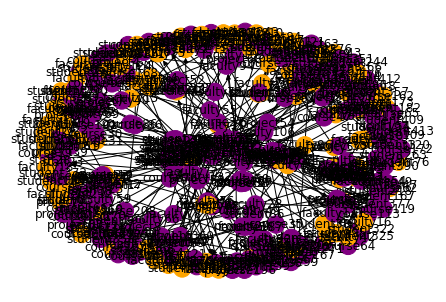

In [40]:
ranktorank_between("faculty")

      project  Rank-All  Rank
0   project53         1     2
1   project58         2     1
2   project22         3     3
3   project67         4     5
4   project40         5     4
5   project45         6    17
6    project3         7     6
7   project33         8     7
8   project41         9    22
9   project66        10     8
10  project73        11    11
11  project61        12    18
12  project54        13    10
13  project34        14     9
14  project63        15    12
15   project4        16    19
16  project68        17    26
17  project78        18    14
18  project18        19    29
19  project79        20    13
20  project35        21    15
21  project38        22    21
22  project57        23    16
23  project11        24    30
24  project36        25    23
25  project26        26    24
26  project19        27    33
27  project42        28    32
28  project37        29    20
29  project25        30    25
30  project51        31    40
31  project49        32    27
32  projec

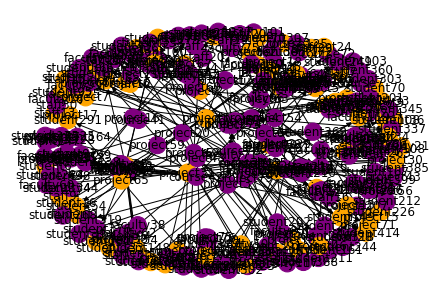

In [41]:
ranktorank_between("project")